# 1.4.3 Arrays and Images
## Introduction
Have you ever played with special photo effects on a computer? Now that you know that images are really just zeros and ones, you might wonder: how are those special effects created?

Even very routine computer work involves constant manipulation of images. Every time you move a window on the screen, click on a menu, or even just move the mouse, the pixels on the screen change. What algorithms are used to determine the zeros and ones for the graphics card to send to the monitor? 

Ready, set, JPG!

In the previous activity, you created an ndarray called ax. It was an array of SubplotAxes objects. You accessed one SubplotAxes by using an index in square brackets: ax[0]. You probably recognize that this is the same syntax used to access an element of a list. However, the ndarray is different than a list; it is an array. All the elements of an array are of the same type, and as a result the computer can access the elements more quickly. Lists and tuples are slower than arrays, but they can mix different data types, like strings and integers. 

Execute the following code and consider line 15. 

In [ ]:
'''
JDoe_JSmith_1_4_3: Change pixels in an image.
'''
%matplotlib inline
import matplotlib.pyplot as plt 
import os.path
import numpy as np      # “as” lets us use standard abbreviations

'''Read the image data'''
# Get the directory of this python script
directory = os.getcwd()
# Build an absolute filename from directory + filename
filename = os.path.join(directory, 'woman.jpg')
# Read the image data into an array
img = plt.imread(filename)

'''Show the image data'''
# Create figure with 1 subplot
fig, ax = plt.subplots(1, 1)
# Show the image data in a subplot
ax.imshow(img, interpolation='none')
# Show the figure on the screen
fig.show()

The imread() function is not a method being called on an object here; plt was the nickname we assigned to the matplotlib.pyplot library when we imported it. The imread() function takes a string that is the name of the image file. It returns an array object that is an ndarray, an object with properties and methods defined in the numpy library. 

## Exercise 1
try typing the following code in the below cell
```python
In []: type(img)
```


In [ ]:
type(img)

The authors of the ndarray package called it ndarray because it supports n-dimensional (i.e., any dimensional) arrays. Image arrays can be 2-dimensional 
```python 
[row][column]
```
if each pixel is represented by only one number, as in a black and white image. In an RGB color image, each pixel is a list of three color intensities. Some color images have a fourth number for each pixel called the alpha channel that identifies how opaque the pixel is. Opaque is the opposite of transparent; you cannot see through an opaque object. Whether the array for each pixel has three or four elements, a color image is a 3-dimensional array: 
```python
[row][column][color channel]
```
Examine the output: for the following cells


In [ ]:
img

Each pixel is an array of three numbers—red, green, and blue intensities—each between 0 and 255, inclusive. An array of these pixel arrays forms a row of pixels. An array of the row arrays forms the image. Since img is an array of rows,

In [ ]:
len(img) #Number of rows of pixels in an image

In [ ]:
len(img[0]) # How wide in pixels an image is

Since img[5] is the 6th row of pixels (don't forget the first one is indexed with zero!), img[5][9] is the 10th pixel in the 6th row. Since the three elements of that pixel's array are RGB intensities, img[5][9][1] is the green intensity at (5, 9).


## Part 2: Manipulating Pixels

You can assign new values to a pixel. The cell below contains an additional code block inserted before the image is diplayed.
Here is the added code block
```python
###
# Make a rectangle of pixels yellow
###

height = len(img)
width = len(img[0])
for row in range(200, 220):
    for column in range(50, 100):
        img[row][column] = [255, 255, 0] # red + green = yellow
```



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import os.path
import numpy as np      # “as” lets us use standard abbreviations

'''Read the image data'''
# Get the directory of this python script
directory = os.getcwd()
# Build an absolute filename from directory + filename
filename = os.path.join(directory, 'woman.jpg')
# Read the image data into an array
img = plt.imread(filename)

'''Show the image data'''
# Create figure with 1 subplot
fig, ax = plt.subplots(1, 1)
# Show the image data in a subplot
ax.imshow(img, interpolation='none')
# Show the figure on the screen
###
# Make a rectangle of pixels yellow
###

height = len(img)
width = len(img[0])
for row in range(200, 220):
    for column in range(50, 100):
        img[row][column] = [255, 255, 0] # red + green = yellow
fig.show()

The nested for loops iterate through a rectangle of pixels. The outer loop runs through each row, from row 200 through row 219. For each iteration of that outer loop, the inner loop works across the image from column 50 to column 99. A new list of RGB values is assigned to every one of these pixels.  

## Exercise 2
Copy and modify the code to create a green rectangle that covers the woman's earring (guesstimate the coordinates). 


In [ ]:
#Insert code that adds a green square overing the woman's earring here

The assignment in line 30 from the previous step can be placed within an if structure so that not all pixels get the new assignment. Try replacing the code for a colored rectangle from the previous step with lines 22-31 of the following code. The conditional in the new line 30 uses the built-in function sum() to add together the values of the three RGB pixels. If red + green + blue is more than 500, the pixel was bright and in this image was probably the sky.

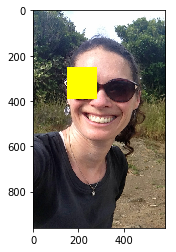

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt 
import os.path
import numpy as np      # “as” lets us use standard abbreviations

'''Read the image data'''
# Get the directory of this python script
directory = os.getcwd()
# Build an absolute filename from directory + filename
filename = os.path.join(directory, 'woman.jpg')
# Read the image data into an array
img = plt.imread(filename)
img.setflags(write=1)


# Make a rectangle of pixels yellow
###

height = len(img)
width = len(img[0])
for r in range(250, 390):
    for c in range(150,280):
        if sum(img[r][c]): # brightness R+G+B goes up to 3*255=765
            img[r][c]=[255,255,0] # R + B = magenta

'''Show the image data'''
# Create figure with 1 subplot
fig, ax = plt.subplots(1, 1)
# Show the image data in a subplot
ax.imshow(img, interpolation='none')
# Show the figure on the screen
###

###
# Show the image data
###
fig.show()

## Exercise 3
a. Explain the algorithm used by lines 27-29 of this code.
b. Modify the code so that the algorithm iterates of every pixel in the image not just those in the first 155 rows. Put this code in the cell below.

## Exercise 4
In this step you will create an algorithm that creates a two-color image. One RGBA color will be transparent (alpha=0) and the other RGBA color will be opaque (alpha=255.) <b>Experiment with the program make_mask.py from this Activity's source code as an example to start with.</b> The code provided creates the following image. 

<b>Modify the code to create an ndarray representing an RGBA pattern of your own design. Your array should have three dimensions: [rows][columns][RGBA]. </b>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

def make_mask(rows, columns, stripe_width):
    '''An example mask generator
    Makes slanted stripes of width stripe_width
    image
    returns an ndarray of an RGBA image rows by columns
    '''
    
    img = PIL.Image.new('RGBA', (columns, rows))
    image = np.array(img)
    for row in range(rows):
        for column in range(columns):
            if (row+column)/stripe_width % 2 == 0: 
                #(r+c)/w says how many stripes above/below line y=x
                # The % 2 says whether it is an even or odd stripe
                
                # Even stripe
                image[row][column] = [255, 127, 127, 0] # pale red, alpha=0
            
            else:
                # Odd stripe
                image[row][column] = [255, 0, 255, 255] # magenta, alpha=255
    return image
    
if __name__ == "__main__":
    image = make_mask(100,100,20)
    
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image)
    fig.show()            
              


## Conclusion
1. Describe what the data in a digital image contains, and describe what it means if a digital image has been “altered.”

2. What are some of the differences between a photograph taken with light-sensitive film and a photograph taken with a digital camera? In what ways are they the same? 

3. There are ways to send secret information in photographs using the lowest-place-value bits in each color byte. Concealing information in an image is called steganography. The 1s place and 2s place of each RGB pixel intensity could be changed to encode the numbers 0 to 63, more than enough for the alphabet. 
   
        a. Explain why these 6 bits are of least significance in the image representation.

        b. Explain why 6 bits are enough to encode 0 to 63.

        c. How would this make the image look different? 

4. If you google "Python image analysis," you can find several Python libraries that will analyze an image. At least one library has a method or function that can determine how many separate objects are in the image. In very rough terms, describe how you think such an algorithm might acquire this information from the RGB pixel values. 